In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential

In [2]:
data = pd.read_csv('HistoricalQuotes.csv')

The columns Open and Close represent the starting and final price at which the stock is traded on a particular day.
High, Low and Last represent the maximum, minimum, and last price of the share for the day.

In [3]:
data

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23
...,...,...,...,...,...,...
2513,03/05/2010,$31.2786,224647427,$30.7057,$31.3857,$30.6614
2514,03/04/2010,$30.1014,89591907,$29.8971,$30.1314,$29.8043
2515,03/03/2010,$29.9043,92846488,$29.8486,$29.9814,$29.7057
2516,03/02/2010,$29.8357,141486282,$29.99,$30.1186,$29.6771


## Preprocessing the Dataset

In [4]:
#columns have white spaces, which have to be removed
data.columns

Index(['Date', ' Close/Last', ' Volume', ' Open', ' High', ' Low'], dtype='object')

In [5]:
#all the entries are in string format
data[' Open'][2513]

' $30.7057'

In [6]:
data.columns = data.columns.str.lstrip()

In [7]:
for i in data.columns:
  if i!='Date':
    for j in range(0,2518):
      data[i][j] = str(data[i][j]).replace(' ','')
      data[i][j] = str(data[i][j]).replace('$','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [8]:
for i in data.columns:
  if i!='Date':
      data[i] = data[i].astype(float)

In [9]:
data

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,273.3600,106721200.0,257.2600,278.4100,256.3700
1,02/27/2020,273.5200,80151380.0,281.1000,286.0000,272.9600
2,02/26/2020,292.6500,49678430.0,286.5300,297.8800,286.5000
3,02/25/2020,288.0800,57668360.0,300.9500,302.5300,286.1300
4,02/24/2020,298.1800,55548830.0,297.2600,304.1800,289.2300
...,...,...,...,...,...,...
2513,03/05/2010,31.2786,224647427.0,30.7057,31.3857,30.6614
2514,03/04/2010,30.1014,89591907.0,29.8971,30.1314,29.8043
2515,03/03/2010,29.9043,92846488.0,29.8486,29.9814,29.7057
2516,03/02/2010,29.8357,141486282.0,29.9900,30.1186,29.6771


In [10]:
data.Date = pd.to_datetime(data.Date)
data.sort_values('Date', ascending = True, inplace=True)

In [11]:
data

,Date,Close/Last,Volume,Open,High,Low
2517,2010-03-01,29.8557,137312041.0,29.3928,29.9286,29.3500
2516,2010-03-02,29.8357,141486282.0,29.9900,30.1186,29.6771
2515,2010-03-03,29.9043,92846488.0,29.8486,29.9814,29.7057
2514,2010-03-04,30.1014,89591907.0,29.8971,30.1314,29.8043
2513,2010-03-05,31.2786,224647427.0,30.7057,31.3857,30.6614
...,...,...,...,...,...,...
4,2020-02-24,298.1800,55548830.0,297.2600,304.1800,289.2300
3,2020-02-25,288.0800,57668360.0,300.9500,302.5300,286.1300
2,2020-02-26,292.6500,49678430.0,286.5300,297.8800,286.5000
1,2020-02-27,273.5200,80151380.0,281.1000,286.0000,272.9600


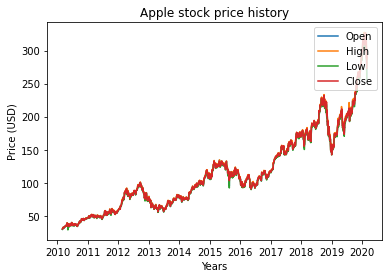

<Figure size 432x288 with 0 Axes>

In [15]:
from matplotlib import pyplot as plt
plt.figure()
plt.plot(data['Date'],data["Open"])
plt.plot(data['Date'],data["High"])
plt.plot(data['Date'],data["Low"])
plt.plot(data['Date'],data["Close/Last"])
plt.title('Apple stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Years')
plt.legend(['Open','High','Low','Close'], loc='upper right')
plt.show()
plt.savefig('Apple stock price history')

The profit or loss calculation is usually determined by the closing price of a stock for the day, hence the closing price will be considered as the target variable. 

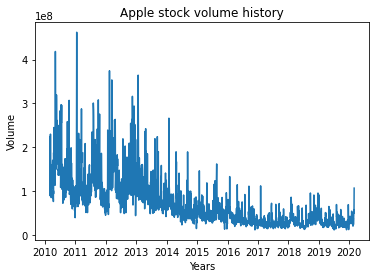

<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure()
plt.plot(data["Date"],data["Volume"])
plt.title('Apple stock volume history')
plt.ylabel('Volume')
plt.xlabel('Years')
plt.show()
plt.savefig("Apple stock volume history")

In [16]:
#check whether null values present
data.isna().sum()    

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [17]:
data

,Date,Close/Last,Volume,Open,High,Low
2517,2010-03-01,29.8557,137312041.0,29.3928,29.9286,29.3500
2516,2010-03-02,29.8357,141486282.0,29.9900,30.1186,29.6771
2515,2010-03-03,29.9043,92846488.0,29.8486,29.9814,29.7057
2514,2010-03-04,30.1014,89591907.0,29.8971,30.1314,29.8043
2513,2010-03-05,31.2786,224647427.0,30.7057,31.3857,30.6614
...,...,...,...,...,...,...
4,2020-02-24,298.1800,55548830.0,297.2600,304.1800,289.2300
3,2020-02-25,288.0800,57668360.0,300.9500,302.5300,286.1300
2,2020-02-26,292.6500,49678430.0,286.5300,297.8800,286.5000
1,2020-02-27,273.5200,80151380.0,281.1000,286.0000,272.9600


## Creating the training and test data

In [18]:
df = data['Close/Last']
#df.set_index('Date', inplace=True)

In [19]:
df

2517     29.8557
2516     29.8357
2515     29.9043
2514     30.1014
2513     31.2786
          ...   
4       298.1800
3       288.0800
2       292.6500
1       273.5200
0       273.3600
Name: Close/Last, Length: 2518, dtype: float64

In [20]:
#normalizing the values for better predictions
scaler = MinMaxScaler(feature_range=(0,1))

In [21]:
# reshape the data before calling scaler.fit_transform because it works only on np arrays
df = scaler.fit_transform(np.array(df).reshape(-1,1))

In [22]:
df

array([[6.72575693e-05],
       [0.00000000e+00],
       [2.30693463e-04],
       ...,
       [8.83812549e-01],
       [8.19480684e-01],
       [8.18942624e-01]])

In [23]:
training_size = int(0.7*df.shape[0])
test_size = df.shape[0] - training_size
train_data = df[:training_size, :]
test_data = df[training_size:, :]

In [24]:
df.shape

(2518, 1)

In [25]:
test_data.shape

(756, 1)

In [26]:
train_data.shape

(1762, 1)

## Sliding Window Approach for the Training and Test Datasets

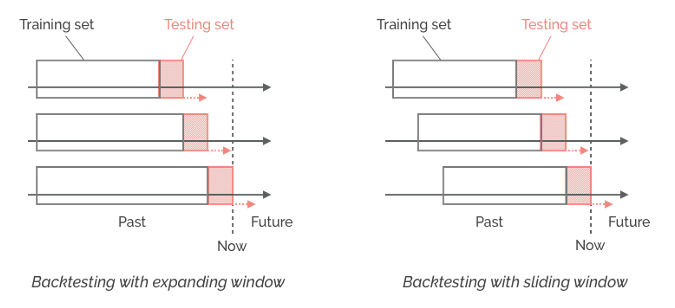

A window size of 100 is chosen for this particular dataframe.

In [28]:
window_size = 100

In [29]:
x_train2, y_train2 = [], []
for i in range(window_size, train_data.shape[0]):         # a single prediction on the basis of the last 100 days
  x_train2.append(train_data[i-window_size:i,0])
  y_train2.append(train_data[i,0])

x_train2, y_train2 = np.array(x_train2), np.array(y_train2)
x_train2 = x_train2.reshape((x_train2.shape[0], x_train2.shape[1], 1))      # to make the input size compatible with the LSTM input size

In [30]:
x_test2, y_test2 = [], []
for i in range(window_size, test_data.shape[0]):
  x_test2.append(test_data[i-window_size:i, :])
  y_test2.append(test_data[i,:])

x_test2, y_test2 = np.array(x_test2), np.array(y_test2)

In [31]:
x_train2.shape

(1662, 100, 1)

In [32]:
x_test2.shape

(656, 100, 1)

In [33]:
model = Sequential()
model.add(LSTM(units = 50, input_shape = (x_train2.shape[1],1), return_sequences=True))
model.add(Dropout(0.2))
#model.add(LSTM(units = 50, return_sequences = True))
#model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dense(units = 1, activation = 'linear'))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train2, y_train2, validation_data = (x_test2, y_test2) ,epochs= 200, batch_size= 64, verbose=1)

Epoch 1/200
26/26 [==============================] - 24s 53ms/step - loss: 0.0119 - val_loss: 0.0104
Epoch 2/200
26/26 [==============================] - 0s 13ms/step - loss: 9.0057e-04 - val_loss: 0.0012
Epoch 3/200
26/26 [==============================] - 0s 12ms/step - loss: 2.1743e-04 - val_loss: 9.0967e-04
Epoch 4/200
26/26 [==============================] - 0s 12ms/step - loss: 1.7399e-04 - val_loss: 8.6303e-04
Epoch 5/200
26/26 [==============================] - 0s 12ms/step - loss: 1.6632e-04 - val_loss: 8.1616e-04
Epoch 6/200
26/26 [==============================] - 0s 12ms/step - loss: 1.6272e-04 - val_loss: 0.0012
Epoch 7/200
26/26 [==============================] - 0s 12ms/step - loss: 1.6292e-04 - val_loss: 8.3505e-04
Epoch 8/200
26/26 [==============================] - 0s 13ms/step - loss: 1.4808e-04 - val_loss: 9.3617e-04
Epoch 9/200
26/26 [==============================] - 0s 12ms/step - loss: 1.4759e-04 - val_loss: 8.4739e-04
Epoch 10/200
26/26 [=======================

In [36]:
y_pred = scaler.inverse_transform(model.predict(x_test2))
y_test = scaler.inverse_transform(y_test2)

In [37]:
y_pred[:5]

array([[150.71361],
       [150.46086],
       [151.72964],
       [152.68912],
       [153.4603 ]], dtype=float32)

In [38]:
y_test[:5]

array([[150.27],
       [152.09],
       [152.74],
       [153.46],
       [150.56]])

## Evaluation

In [39]:
import math
from sklearn.metrics import mean_squared_error

rmse_score = math.sqrt(mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error : ',rmse_score)

Root Mean Squared Error :  6.173629468169442


In [40]:
from sklearn.metrics import r2_score
print('R-squared Score  : ',r2_score(y_test,y_pred))

R-squared Score  :  0.9776940440930654


No handles with labels found to put in legend.


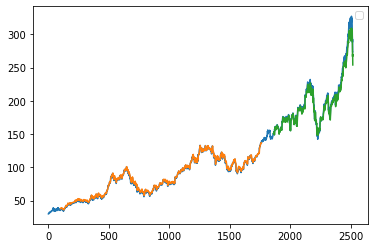

In [41]:
# shift train predictions for plotting
train_predict = scaler.inverse_transform(model.predict(x_train2))

look_back=100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2):len(df), :] = y_pred
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend()
plt.show()

## Future Predictions

In [49]:
x_input = test_data[len(test_data)-window_size:, 0]

In [53]:
x_input=x_input.reshape(1,-1)

In [54]:
# we have the data of 100 days for a single prediction 
x_input.shape

(1, 100)

In [55]:
x_input_list = list(x_input)
x_input_list = list(x_input_list[0])

In [87]:
x_input = x_input.reshape((1, window_size, 1))
prediction = model.predict(x_input)
prediction[0][0]

0.7458584

In [83]:
x_input_list.append(prediction[0][0])

In [86]:
x_input_list

[0.6632413507606663,
 0.6542960940502945,
 0.6631404644067899,
 0.6734308725021799,
 0.6940116886929601,
 0.6928683100156945,
 0.6910187268612943,
 0.6878239923218759,
 0.6908842117227925,
 0.6946842643854693,
 0.7084720660819068,
 0.7066224829275067,
 0.7174509515769041,
 0.7187961029619224,
 0.7288847383495598,
 0.7371910481520478,
 0.7178208682077841,
 0.7177199818539077,
 0.7362158133979095,
 0.7599577353434827,
 0.7656073711605595,
 0.7643631061294176,
 0.7647330227602978,
 0.7720977265932729,
 0.7744853703016804,
 0.7814128999345247,
 0.7806058091035136,
 0.7890466340445037,
 0.7828925664580448,
 0.7933847472611876,
 0.797891004400999,
 0.795167072846337,
 0.784742149612445,
 0.780773953026641,
 0.7800004909802554,
 0.7954361031233406,
 0.7884413159212454,
 0.8003795344632828,
 0.7983954361703809,
 0.7880041417211145,
 0.7721649841625238,
 0.7798659758417537,
 0.7927794291379293,
 0.8100309956507892,
 0.7972856862777408,
 0.8025317766793122,
 0.810232768358542,
 0.812553154497698

In [88]:
len(x_input_list)

101

In [89]:
# since we only need 100 values for our prediction
x_input_list.remove(x_input_list[0])

In [90]:
x_input_list

[0.6542960940502945,
 0.6631404644067899,
 0.6734308725021799,
 0.6940116886929601,
 0.6928683100156945,
 0.6910187268612943,
 0.6878239923218759,
 0.6908842117227925,
 0.6946842643854693,
 0.7084720660819068,
 0.7066224829275067,
 0.7174509515769041,
 0.7187961029619224,
 0.7288847383495598,
 0.7371910481520478,
 0.7178208682077841,
 0.7177199818539077,
 0.7362158133979095,
 0.7599577353434827,
 0.7656073711605595,
 0.7643631061294176,
 0.7647330227602978,
 0.7720977265932729,
 0.7744853703016804,
 0.7814128999345247,
 0.7806058091035136,
 0.7890466340445037,
 0.7828925664580448,
 0.7933847472611876,
 0.797891004400999,
 0.795167072846337,
 0.784742149612445,
 0.780773953026641,
 0.7800004909802554,
 0.7954361031233406,
 0.7884413159212454,
 0.8003795344632828,
 0.7983954361703809,
 0.7880041417211145,
 0.7721649841625238,
 0.7798659758417537,
 0.7927794291379293,
 0.8100309956507892,
 0.7972856862777408,
 0.8025317766793122,
 0.810232768358542,
 0.8125531544976985,
 0.824962176024492

In [93]:
x_input = np.array(x_input_list)
x_input = x_input.reshape((1, window_size, 1))
prediction = model.predict(x_input)
prediction[0][0]

0.68279654

In [97]:
scaler.inverse_transform([[0.7458584, 0.68279654]])

array([[251.62736102, 232.87501516]])

### Combining everything into a single block

In [125]:
x_input = test_data[len(test_data)-window_size:, 0].reshape((1, window_size))
x_input_list = list(x_input[0])
days = 10

for i in range(days):
  x_input = np.array(x_input_list)
  prediction =  model.predict(x_input.reshape(1, window_size, 1))
  print(f'Prediction for day {i+1}:', scaler.inverse_transform(prediction)[0][0])
  x_input_list.append(prediction[0][0])
  x_input_list.remove(x_input_list[0])

Prediction for day 1: 251.62735
Prediction for day 2: 232.87502
Prediction for day 3: 213.81096
Prediction for day 4: 196.01752
Prediction for day 5: 180.13759
Prediction for day 6: 166.6258
Prediction for day 7: 155.65532
Prediction for day 8: 147.15697
Prediction for day 9: 140.9144
Prediction for day 10: 136.6406


In [129]:
x_input_list

[0.7084720660819068,
 0.7066224829275067,
 0.7174509515769041,
 0.7187961029619224,
 0.7288847383495598,
 0.7371910481520478,
 0.7178208682077841,
 0.7177199818539077,
 0.7362158133979095,
 0.7599577353434827,
 0.7656073711605595,
 0.7643631061294176,
 0.7647330227602978,
 0.7720977265932729,
 0.7744853703016804,
 0.7814128999345247,
 0.7806058091035136,
 0.7890466340445037,
 0.7828925664580448,
 0.7933847472611876,
 0.797891004400999,
 0.795167072846337,
 0.784742149612445,
 0.780773953026641,
 0.7800004909802554,
 0.7954361031233406,
 0.7884413159212454,
 0.8003795344632828,
 0.7983954361703809,
 0.7880041417211145,
 0.7721649841625238,
 0.7798659758417537,
 0.7927794291379293,
 0.8100309956507892,
 0.7972856862777408,
 0.8025317766793122,
 0.810232768358542,
 0.8125531544976985,
 0.8249621760244924,
 0.8408013335830831,
 0.8426509167374833,
 0.8403977881675776,
 0.8413393941370904,
 0.8393889246288139,
 0.8547236504180226,
 0.8556316276029099,
 0.8745982621316681,
 0.874228345500788

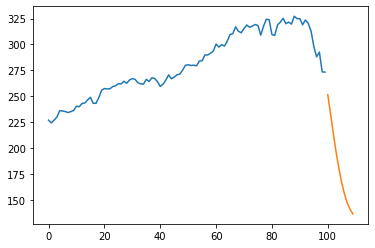

In [146]:
plt.plot(np.arange(0,window_size), scaler.inverse_transform(test_data[len(test_data)-window_size:]))
plt.plot(np.arange(window_size,window_size + 10), scaler.inverse_transform(np.array(x_input_list[-10:]).reshape(-1,1)))